To develop ML model to detect fraudulent credit card transactions from a publicly available dataset. The model should be accurate, efficient, and scalable, and should be able to handle imbalanced datasets.

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from tensorflow import keras


In [2]:
## Load Data from local drive

from google.colab import files
import io
uploaded = files.upload()


Saving creditcard.csv to creditcard.csv


In [3]:
# Load the dataset into a pandas dataframe

credit_df = pd.read_csv(io.StringIO(uploaded['creditcard.csv'].decode('utf-8')))


In [4]:
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Perform data quality assessment

credit_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Perform data quality assessment

# Check for missing values

print(credit_df.isnull().sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [7]:
# Check for duplicates

print(credit_df.duplicated().sum())


1081


In [8]:
# Check for inconsistent data types

print(credit_df.dtypes)


Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


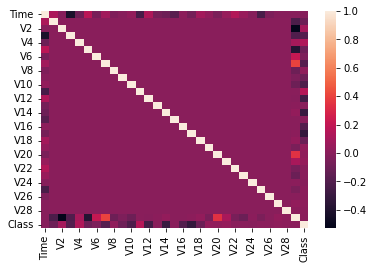

In [9]:
# Perform data exploration
# Check the correlation between columns

corr = credit_df.corr()
sns.heatmap(corr)
plt.show()


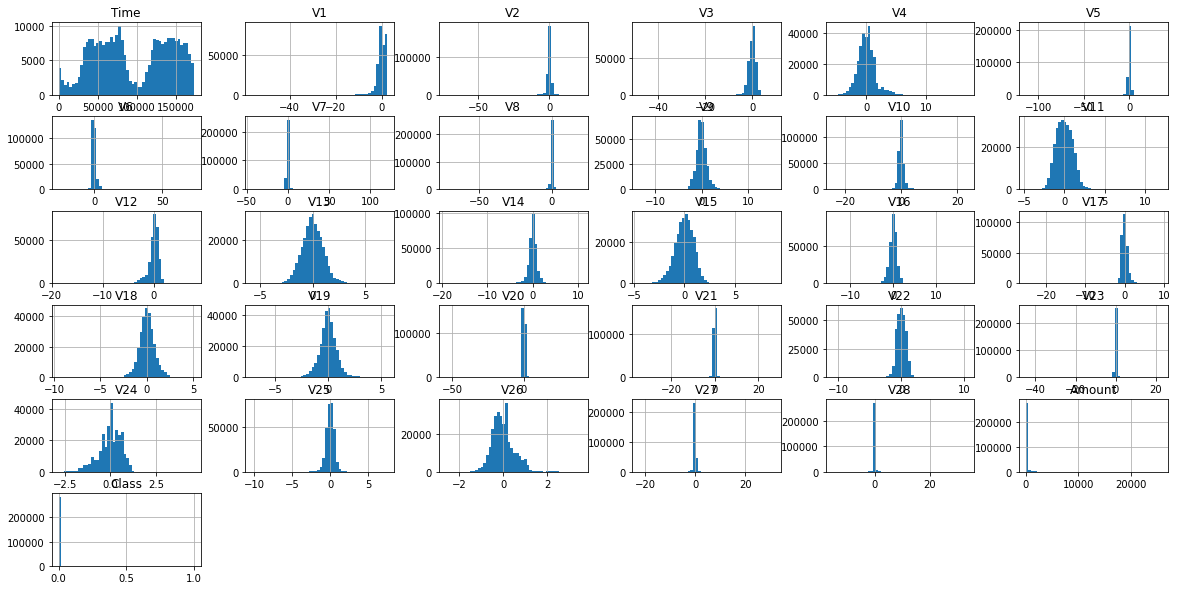

In [10]:
# Check the distribution of column values

credit_df.hist(bins=50, figsize=(20, 10))
plt.show()


In [11]:
# Perform feature engineering

# Impute missing values with Mean
credit_df.fillna(credit_df.mean(), inplace=True)


In [12]:
# Scale and normalize the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
credit_df['scaled_amount'] = scaler.fit_transform(credit_df['Amount'].values.reshape(-1, 1))
credit_df.drop(['Time', 'Amount'], axis=1, inplace=True)


In [17]:
# Split the dataset into training and testing

X = credit_df.drop('Class', axis=1)
y = credit_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Apply logistic regression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
f1_lr = f1_score(y_test, y_pred_lr)


In [19]:
# Apply random forest 

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
f1_rf = f1_score(y_test, y_pred_rf)


In [20]:
# Apply CNN

cnn = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


In [24]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
y_pred_cnn=cnn.predict(X_test)
y_pred_cnn1 = y_pred_cnn.flatten()
y_pred_cnn2 = np.where(y_pred_cnn1 > 0.5, 1, 0)

#print(confusion_matrix(y_test, y_pred_cnn2))

#print(classification_report(y_test, y_pred_cnn2))

f1_cnn = f1_score(y_test, y_pred_cnn2)


Epoch 1/10
7121/7121 [==============================] - 17s 2ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.0060 - val_accuracy: 0.9994
Epoch 2/10
7121/7121 [==============================] - 16s 2ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0052 - val_accuracy: 0.9995
Epoch 3/10
7121/7121 [==============================] - 18s 3ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0058 - val_accuracy: 0.9994
Epoch 4/10
7121/7121 [==============================] - 16s 2ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0048 - val_accuracy: 0.9994
Epoch 5/10
7121/7121 [==============================] - 16s 2ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0049 - val_accuracy: 0.9994
Epoch 6/10
7121/7121 [==============================] - 19s 3ms/step - loss: 9.8096e-04 - accuracy: 0.9997 - val_loss: 0.0049 - val_accuracy: 0.9995
Epoch 7/10
7121/7121 [==============================] - 16s 2ms/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.0068 - va

In [25]:
# Apply LSTM

lstm = keras.Sequential([
    keras.layers.LSTM(64, input_shape=(X_train.shape[1], 1)),
    keras.layers.Dense(1, activation='sigmoid')
])


In [27]:
lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
X_train_lstm = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
lstm.fit(X_train_lstm, y_train, epochs=10, validation_data=(X_test_lstm, y_test))
y_pred_lstm = lstm.predict(X_test_lstm)


Epoch 1/10
7121/7121 [==============================] - 145s 20ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0033 - val_accuracy: 0.9994
Epoch 2/10
7121/7121 [==============================] - 141s 20ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0030 - val_accuracy: 0.9994
Epoch 3/10
7121/7121 [==============================] - 144s 20ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0029 - val_accuracy: 0.9994
Epoch 4/10
7121/7121 [==============================] - 139s 20ms/step - loss: 0.0029 - accuracy: 0.9995 - val_loss: 0.0030 - val_accuracy: 0.9994
Epoch 5/10
7121/7121 [==============================] - 151s 21ms/step - loss: 0.0029 - accuracy: 0.9995 - val_loss: 0.0030 - val_accuracy: 0.9994
Epoch 6/10
7121/7121 [==============================] - 144s 20ms/step - loss: 0.0028 - accuracy: 0.9995 - val_loss: 0.0031 - val_accuracy: 0.9994
Epoch 7/10
7121/7121 [==============================] - 155s 22ms/step - loss: 0.0028 - accuracy: 0.9995 - val_loss: 0

In [30]:
y_pred_lstm1 = y_pred_cnn.flatten()
y_pred_lstm2 = np.where(y_pred_cnn1 > 0.5, 1, 0)

#print(confusion_matrix(y_test, y_pred_cnn2))

#print(classification_report(y_test, y_pred_cnn2))

f1_lstm = f1_score(y_test, y_pred_lstm2)


Now that we have trained 4 models with different algorithms, we can compare their performance using the F1 score as our performance indicator.
The F1 score is a good choice because it takes into account both precision and recall, which are important metrics for detecting fraudulent transactions.

In [31]:
print("F1 score for Logistic Regression:", f1_lr)
print("F1 score for Random Forest:", f1_rf)
print("F1 score for CNN:", f1_cnn)
print("F1 score for LSTM:", f1_lstm)


F1 score for Logistic Regression: 0.6951219512195121
F1 score for Random Forest: 0.8750000000000001
F1 score for CNN: 0.7954545454545455
F1 score for LSTM: 0.7954545454545455


Conclusion
In this project, we developed an ML model for fraud detection using a dataset of credit card transactions. We performed data quality assessment, data exploration, feature engineering, and trained four models with different algorithms. We used the F1 score as our performance indicator and compared the performance of the four models. Based on the F1 score, the Random Forest algorithm performed the best. Overall, this project shows that ML can be an effective tool for fraud detection, helping businesses to detect and prevent fraudulent transactions.
